<a href="https://colab.research.google.com/github/MachineLearnia/Regression-logistique-numpy/blob/main/01_regression_logistique_class_binaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#0. Dataset (Classification Binaire)

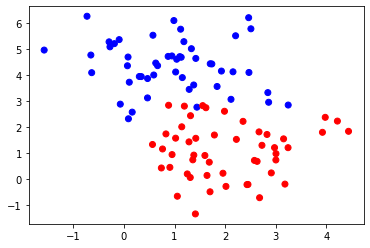

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

#1. Modele

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [4]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [5]:
def forward_propagation(X, W, b):
  Z = X.dot(W) + b
  A = sigmoid(Z)
  return A

#2. Fonction Cout et Gradients

In [6]:
def log_loss(y, A):
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [7]:
def gradients(X, A, y):
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)
  return (dW, db)

#3. Optimisation (Descente de Gradient)

In [8]:
def optimisation(X, W, b, A, y, learning_rate):
  dW, db = gradients(X, A, y)
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

#4. Prédiction et visualisation

In [9]:
def predict(X, W, b):
  A = forward_propagation(X, W, b)
  return A >= 0.5

In [10]:
def visualisation(X, y, W, b):
  resolution = 300
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

  #limites du graphique
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # meshgrid
  x1 = np.linspace(xlim[0], xlim[1], resolution)
  x2 = np.linspace(ylim[0], ylim[1], resolution)
  X1, X2 = np.meshgrid(x1, x2)

  # assembler les 2 variables
  XX = np.vstack((X1.ravel(), X2.ravel())).T

  # Prédictions
  Z = predict(XX, W, b)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
  ax.contour(X1, X2, Z, colors='g')

#5. Modele final

In [14]:
def regression_logistique(X, y, learning_rate=2, n_iter=20):
  
  # Initialisation
  W, b = initialisation(X)
  loss_history = []

  # Entrainement
  for i in range(n_iter):
    A = forward_propagation(X, W, b)
    loss_history.append(log_loss(y, A))
    W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
  visualisation(X, y, W, b)
  plt.figure(figsize=(9, 6))
  plt.plot(loss_history)
  plt.xlabel('n_iteration')
  plt.ylabel('Log_loss')
  plt.title('Evolution des erreurs')

/tmp/ipykernel_1609/1980678688.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)


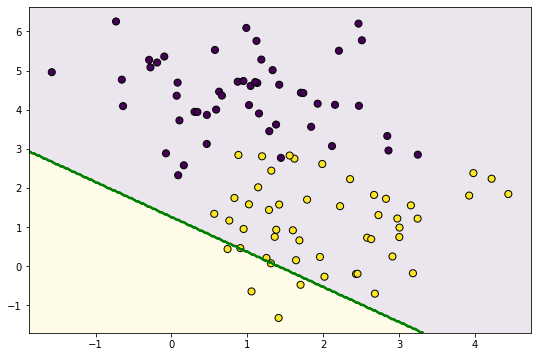

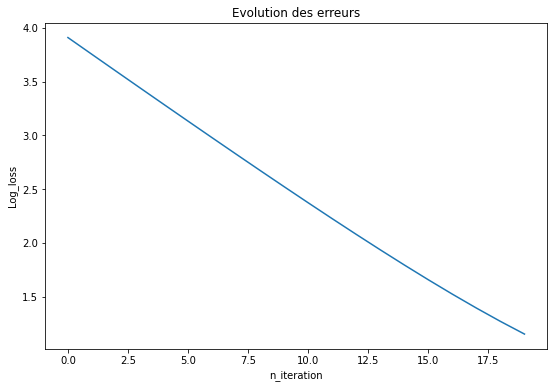

In [15]:
regression_logistique(X, y)